## Introducción a la Inferencia Causal

Usos frecuentes:
- Análisis de impacto de las políticas. [Wendy](https://ar.linkedin.com/in/wendy-brau/es) trabaja en el Banco Mundial realizando esto
- Experimentos en física. Identificar relaciones causales más probables en base a IA

In [1]:
# Importamos las librerías a utilizar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Para regresión lineal hay distintas opciones:
from sklearn.linear_model import LinearRegression # sci-kit learn
import statsmodels.api as sm # stats models



¿Para que sirve?
- Decisiones
  - Política
  - Marketing
  - Tratamientos
- Establecer causalidad

**¿Cuándo y cómo podemos establecer causalidad? Condiciones necesarias y suficientes**
¿Por qué es distinto predecir que establecer efecto causal?
Métodos y ejemplos de aplicación

Conocimientos estadísticos básicos son necesarios, además de regresiones lineares para estimaciones. Se puede complementar con este [curso](https://github.com/institutohumai/cursos-python/tree/master/MatematicasParaIA)

## ¿Qué es la causalidad?

### 1. ¿Por qué importa?

**Toma de decisiones en escenarios contrafácticos: comparación de escenarios**
- Evaluación de campañas de Marketing. Ej. UBER, MICROSOFT
- Evaluación de políticas públicas e impacto. Ej. WORLD BANK

**Inteligencia Artificial**
- El razonamiento naturalmente se funda en relaciones causales
no correlacionales
- *ontológicas* vs *epistémicas*

### 2. ¿Qué es?

**¿Qué no es?... correlación no es causalidad**
- Correlación espuria
- Correlación y Coeficiente de correlación de Pearson no es lo mismo
  - Datasaurio y el cuarteto de Anscombe. Estadísticos descriptivos iguales
  - Es necesario en todos los casos el dataviz
  - Correlación de Pearson solo es válido en distribuciones normales o correlaciones lineales
- La probabilidad condicional es la correlación. Dependencia e independencia estadística
  - Independiente


$$p(X, Y) = p(X) p(Y)$$
  
$$ p(X|Y = y) = p(X)$$
$$ p(Y|X = x) = p(Y)$$

$$\renewcommand{\indep}{\perp \!\!\! \perp} X \indep Y$$

**Cuando hablamos de correlación, no nos referimos solamente a la correlación lineal** sino que **dos variables $X$, $Y$ están correlacionadas en alguna medida siempre que $p(X, Y) \neq p(X) p(Y)$**.


Distribución de probabilidad conjunta no alcanza para tener una representación completa del problema de inferencia al que nos enfrentemos.

> Si existe correlación es más probable establecer las causalidades

- Principio de Causa Común de Reichenbach

### Los mundos contrafácticos

La causa existe si hay un efecto

### La Paradoja de Simpson


<center><img src="imgs/simpson_calculos_renales.png" style="margin:auto" height=150/></center>

* A es preferible a ver en cada caso pero no en ambos.


Notemos que la mayoría de las personas que recibieron el tratamiento A tenían cálculos renales grandes (lo cual en sí es una condición de salud menos favorable) mientras que la mayoría de las personas que recibieron el tratamiento B tenían cálculos renales pequeños

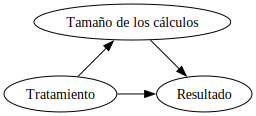

In [2]:
# Grafos
from graphviz import Digraph
from IPython.display import display

#Especificamos engine='neato' para poder usar argumento `pos` en nodos
dot = Digraph(engine='neato')
dot.node('T', 'Tratamiento', pos='1,1!')
dot.node('Y', 'Resultado', pos='3,1!')
dot.node('X', 'Tamaño de los cálculos', pos='2,2!')
dot.edges(['TY', 'XY', 'TX'])
dot

Los grafos sirven para ver el orden de las relaciones causales

Al tratamiento A le dan los peores casos. La asignación de casos responde al siguente grafo más que al primero. Con lo cual el tamaño de los calculos determina al tratamiento y condiciona los resultados de cada tratamiento


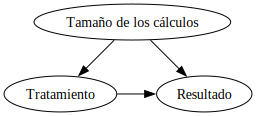

In [3]:
dot = Digraph(engine='neato')
dot.node('T', 'Tratamiento', pos='1,1!')
dot.node('Y', 'Resultado', pos='3,1!')
dot.node('X', 'Tamaño de los cálculos', pos='2,2!')
dot.edges(['TY', 'XY', 'XT'])
dot

Otro ejemplo es la correlación entre colesterol y ejercicio, condicionado por edad

<center><img src="imgs/simpson_cholesterol_age.png" style="margin:auto"/></center>

## Marco conceptual: *potential outcomes*

### **Esperanzas condicionales**

**Probabilidad condicional**: $P(Y/X)$ es la probabilidad de $Y$ dado que sucedio el evento $X$
**La esperanza condicional**: Asimilable a promedio por grupos. Ejemplo con edad y peso

<center><img src="imgs/esperanza_condicional.png" style="margin:auto"/></center>


### **Primer caso**

IR AL HOSPITAL $\rightarrow$ SALUD LUEGO DE IR AL HOSPITAL

* Tratamiento del individuo $i$     
$$
\begin{equation}
    T_i=
    \begin{cases}
      1 & \text{si fue al hospital} \\
      0 & \text{si no fue al hospital}
    \end{cases}
  \end{equation}
$$

* Resultado observado para el individuo $i$    
$$
Y_i= \text{indicador de mala salud}
$$

* Resultados potenciales para el individuo i 
$$
\begin{equation}
   Y_i(T_i) =
    \begin{cases}
      Y_i(T_i = 1) = Y_i(1) & \text{resultado potencial de ir al hospital} \\
      Y_i(T_i = 0) = Y_i(0) & \text{resultado potencial de no ir al hospital}
    \end{cases}
  \end{equation}
$$

El intento es por evaluar *ceteris paribus* los **resultados potenciales**, para controlar otras variables que puedan condicionar los resultados. De esta manera obtenemos el ITE como diferencia de resultados

\begin{equation}
 ITE_{Marty} =  \underbrace{Y_{Marty}(T_{Marty} = 1)}_{\substack{\text{ Resultado observado} \\ \text{dado que fue al hospital}}}
- \underbrace{Y_{Marty}(T_{Marty} = 0)}_{\substack{\text{ Resultado observado} \\ \text{dado que NO fue al hospital}}} = Y(1) - Y(0)
\end{equation}

Además de esto, nos interesa ver la distribución de ITE, su media y varianza.

Si en promedio las heridas se salvan yendo al hospital y no hay demasiada varianza, es probable que ir al hospital nos sirva como tratamiento (*esto es un test de diferencia de medias*). El concepto subyacente es el de *Average Treatment Effecto*

$$ 
ATE = E[ITE]
$$

El problema fundamental de la inferencia causal es que no podemos observar los contrafácticos.

| i| $T_i$| $Y_i$ | $Y_i$ $($ $T_i$ $=$ $1$ $)$ |$Y_i$ $($ $T_i$ $=$ $0$ $)$| $ITE_i$|
| --- | --- | --- | --- | --- | --- |
| Marty | 1 (fue al hospital) | $Y_{Marty}$ | $Y_{Marty}$ | ????? | ????? |
| Doc| 0 (no fue al hospital) | $Y_{Doc}$ |  ????? | $Y_{Doc}$| ????? |

### **¿Qué hacemos? Construir un "buen" contrafáctico**

**Nuestro objetivo a lo largo del curso será construir un "buen" contrafáctico**, para poder acercarnos lo más posible al ATE. Observamos uno de los resultados potenciales, queremos aproximar "bien" el resultado que no observamos. Imputar "bien" el dato faltante. Como nunca lo podremos observar, vamos a tener que hacer supuestos. Entonces, ¿qué significará un "buen contrafáctico" o "aproximar bien"? Que los supuestos que usamos para hacerlo sean creíbles. 

La idea a lo largo del curso es ir entrenándonos en entender cuando un contrafáctico es "bueno o creíble" o es "malo" y puede llevarnos a confusiones. Por ejemplo, ¿podríamos usar al Doc, que no va al hospital, como contrafáctico de Marty, que sí fue?

Siguiendo el ejemplo de la tabla, ¿es buen contrafactual utilizar dos personas distintas? ¿qué variables deberíamos controlar para emular el *ceteris paribus*

**Tratamiento de las observaciones**

Datos del National Health Interview Survey de USA

1. Durante los últimos 12 meses, ¿el encuestado paso una noche en el hospital? $\rightarrow T_i$
2. ¿Cómo calificaría su salud? (escala del 1 al 5 en donde 5 es mala salud) $\rightarrow Y_i$

|$T_i$ (grupo)|$N$ (tamaño de muestra)|$\widehat{E[Y_i / T=t]}$ (salud promedio del grupo)|Desvío est.|
| --- | --- | --- | --- |
| 1 (fue al hospital) | 7774 | 2.79 | 0.014 |
| 0 (no fue al hospital) | 90049 | 2.07 | 0.003 |

$$
\begin{equation}
  \underbrace{\widehat E[Y_i | T_i=1]}_{\substack{\text{ Salud (resultado observado) promedio} \\ \text{en los que fueron al hospital}}}  - \underbrace{\widehat E[Y_i | T = 0]}_{\substack{\text{Salud (resultado observado) promedio} \\ \text{en los que  NO fueron al hospital}}}  = \quad 2.79 - 2.07 \quad = \quad \underbrace{0.72}_{\substack{\text{Diferencia promedio} \\ \text{en el indicador de mala salud}}}
\end{equation}
$$

¿Por qué el efecto es positivo? ¿Por qué tienen menos salud quienes SI van al hospital?

Según el siguiente grafo, la condición de salud previa es un gran condicionante del indicador de mala salud y también del grupo que necesito ir al hospital

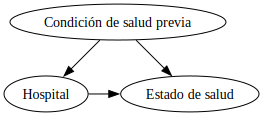

In [5]:
#@title {display-mode: "form"} 
from graphviz import Digraph
from IPython.display import display

#Especificamos engine='neato' para poder usar argumento `pos` en nodos
dot = Digraph(engine='neato')
dot.node('T', 'Hospital', pos='1,1!')
dot.node('Y', 'Estado de salud', pos='3,1!')
dot.node('X', 'Condición de salud previa', pos='2,2!')
dot.edges(['TY', 'XY', 'XT'])
dot

### Confusores y sesgos

* Decimos que la "condición de salud" previa es un **confusor**. 
  * Una variable que está correlacionada tanto con el tratamiento $T_i$ (ir al hospital) como con el resultado $Y_i$ (el estado de salud posterior)
  * Si no la tomamos en cuenta, confundimos el efecto que queremos medir, la visita al hospital (la atención médica y otros servicios recibidos allí) con el confusor
* Decimos que cuando comparamos la salud promedio observada entre quienes fueron al hospital y quienes no, además del **efecto causal** de la visita al hospital, tenemos un **sesgo de selección**: las personas que "se autoseleccionan" para ir a hospital son distintas de las que no van. 
* **No** estamos cumpliendo con la comparación **_ceteris paribus_**: las circunstancias de un grupo (condición mala de salud previa), no son iguales a las del otro (condiciones buenas de salud previa)

* Comparar al grupo de personas que va al hospital con el grupo de personas que no va no sirve para responder nuestra pregunta causal, contrafáctica: ¿una persona que sí fue, está mejor que si no hubiera ido? (es decir, nuestra pregunta por el ITE, o por el ATE)

* Entonces, el grupo de personas que no va al hospital **no es un buen contrafáctico** de las personas que sí van al hospital

_La diferencia de medias entre los resultados observados de grupos tratados y no tratados a veces se la llama "diferencia asociacional"_

* ATE: $E[Y(1) - Y(0)] = E[Y(1)] - E[Y(0)]$ 
* Diferencia asociacional: $E[(Y|T=1)] - E[(Y|T=0)]$

> Es muy importante la diferencia entre los dos conceptos de arriba. La diferencia asociacional es sobre las OBSERVACIONES, el ATE debería ser para todos los resultados potenciales (ergo imposible)